From publications DOI: <a href="http://doi.org/10.1364/OPTICA.487795">http://doi.org/10.1364/OPTICA.487795</a> and DOI: <a href="https://doi.org/10.1038/s41598-023-29762-y">https://doi.org/10.1038/s41598-023-29762-y</a>

In [1]:
# Copyright (c) 2024, ETH Zurich

In [2]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [3]:
rave_sim_dir = Path('/mnt/d/rave-sim-main/rave-sim-main')
simulations_dir = Path('/mnt/d/rave-sim-main/rave-sim-main/output')
scratch_dir = simulations_dir

In [4]:
sys.path.insert(0, str(rave_sim_dir / "big-wave"))
#print(str(rave_sim_dir / "big-wave"))
import multisim
import config
import util

In [5]:
config_dict = {
    "sim_params": {
        "N": 2**22,
        "dx": 3.1e-10,
        "z_detector": 1.77,
        "detector_size": 2e-4,
        "detector_pixel_size_x": 1e-6,
        "detector_pixel_size_y": 1,
        "chunk_size": 256 * 1024 * 1024 // 16,  # use 256MB chunks
    },
    "use_disk_vector": False,
    "save_final_u_vectors": False,
    "dtype": "c8",
    "multisource": {
        "type": "points",
        "energy_range": [46000.0, 47000.0],
        "x_range": [-1e-6, 1e-6],
        "z": 0.0,
        "nr_source_points": 3,
        "seed": 1,
    },
    "elements": [
        {
            "type": "grating",
            "pitch": 4.2e-6,
            "dc": [0.5, 0.5],
            "z_start": 0.1,
            "thickness": 140e-6,
            "nr_steps": 8,
            "x_positions": [0.0],
            "substrate_thickness": (370 - 140) * 1e-6,
            "mat_a": ["Si", 2.34],
            "mat_b": ["Au", 19.32],
            "mat_substrate": ["Si", 2.34],
        },
        {
            "type": "grating",
            "pitch": 4.2e-6,
            "dc": [0.5, 0.5],
            "z_start": 0.918,
            "thickness": 59e-6,
            "nr_steps": 8,
            "x_positions": [0.0],
            "substrate_thickness": (200 - 59) * 1e-6,
            "mat_a": ["Si", 2.34],
            "mat_b": None,
            "mat_substrate": ["Si", 2.34],
        },
        {
            "type": "grating",
            "pitch": 4.2e-6,
            "dc": [0.5, 0.5],
            "z_start": 1.736,
            "thickness": 154e-6,
            "nr_steps": 8,
            "x_positions": np.linspace(0, 4.2e-6, 5, endpoint=False).tolist(),
            "substrate_thickness": (370 - 154) * 1e-6,
            "mat_a": ["Si", 2.34],
            "mat_b": ["Au", 19.32],
            "mat_substrate": ["Si", 2.34],
        },
    ],
}

print("N: ", config_dict["sim_params"]["N"])

N:  4194304


In [6]:
sim_path = multisim.setup_simulation(config_dict, Path("."), simulations_dir)

2025-07-22 10:18:27,786 INFO: Setting up simulation
2025-07-22 10:18:27,862 INFO: Finished setting up simulation in /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250722_101827809831


In [7]:
computed = config.load(Path(sim_path / 'computed.yaml'))

print("cutoff angles:", computed['cutoff_angles'])
print("source points:", computed['source_points'])

cutoff angles: [5.7062146830722226e-05, 6.389593685272419e-05, 0.00018658813293548603, 0.009164513585960618]
source points: [{'x': 1.6243453636632416e-06, 'z': 0.0, 'energy': 46417.02200470257}, {'x': -6.117564136500753e-07, 'z': 0.0, 'energy': 46720.32449344216}, {'x': -5.281717522634556e-07, 'z': 0.0, 'energy': 46000.11437481734}]


In [8]:
# Run this in a for loop to simulate all source points or
# alternatively run the source points as individual euler
# jobs
#multisim.run_single_simulation(sim_path, 0, scratch_dir, save_keypoints_path=scratch_dir)
for i in tqdm(range(config_dict["multisource"]["nr_source_points"])):
    os.system(f"CUDA_VISIBLE_DEVICES=0 /mnt/d/rave-sim-main/rave-sim-main/fast-wave/build-Release/fastwave -s {i} {sim_path}")

  0%|                                                            | 0/3 [00:00<?, ?it/s]

[2025-07-22 10:18:33.568] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250722_101827809831/00000000
[2025-07-22 10:18:34.216] [info] Simulating optical element 1/3
[2025-07-22 10:18:34.248] [info] Elapsed time for optical element: 29.755424 ms
[2025-07-22 10:18:34.251] [info] Simulating optical element 2/3
[2025-07-22 10:18:34.281] [info] Elapsed time for optical element: 28.476255 ms
[2025-07-22 10:18:34.284] [info] Simulating optical element 3/3
[2025-07-22 10:18:34.319] [info] Elapsed time for optical element: 32.60528 ms
[2025-07-22 10:18:34.323] [info] Running phase step 2/5
[2025-07-22 10:18:34.324] [info] Simulating optical element 3/3
[2025-07-22 10:18:34.359] [info] Elapsed time for optical element: 32.550465 ms
[2025-07-22 10:18:34.363] [info] Running phase step 3/5
[2025-07-22 10:18:34.364] [info] Simulating optical element 3/3
[2025-07-22 10:18:34.398] [info] Elapsed time for optical element: 32.589184 ms
[2025-07-22 10:18:34.403] [info] Run

 33%|█████████████████▎                                  | 1/3 [00:01<00:02,  1.04s/it]

[2025-07-22 10:18:34.440] [info] Elapsed time for optical element: 34.12915 ms
[2025-07-22 10:18:34.444] [info] Running phase step 5/5
[2025-07-22 10:18:34.444] [info] Simulating optical element 3/3
[2025-07-22 10:18:34.480] [info] Elapsed time for optical element: 34.194466 ms
[2025-07-22 10:18:34.491] [info] Simulation finished in 0.922361052 seconds
[2025-07-22 10:18:34.608] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250722_101827809831/00000001
[2025-07-22 10:18:34.864] [info] Simulating optical element 1/3
[2025-07-22 10:18:34.893] [info] Elapsed time for optical element: 27.816288 ms
[2025-07-22 10:18:34.896] [info] Simulating optical element 2/3
[2025-07-22 10:18:34.926] [info] Elapsed time for optical element: 27.686272 ms
[2025-07-22 10:18:34.929] [info] Simulating optical element 3/3
[2025-07-22 10:18:34.964] [info] Elapsed time for optical element: 32.686623 ms
[2025-07-22 10:18:34.968] [info] Running phase step 2/5
[2025-07-22 10:18:34.969

 67%|██████████████████████████████████▋                 | 2/3 [00:01<00:00,  1.26it/s]

[2025-07-22 10:18:35.084] [info] Elapsed time for optical element: 33.50573 ms
[2025-07-22 10:18:35.089] [info] Running phase step 5/5
[2025-07-22 10:18:35.089] [info] Simulating optical element 3/3
[2025-07-22 10:18:35.124] [info] Elapsed time for optical element: 34.137695 ms
[2025-07-22 10:18:35.134] [info] Simulation finished in 0.526494405 seconds
[2025-07-22 10:18:35.226] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250722_101827809831/00000002
[2025-07-22 10:18:35.483] [info] Simulating optical element 1/3
[2025-07-22 10:18:35.515] [info] Elapsed time for optical element: 29.85536 ms
[2025-07-22 10:18:35.518] [info] Simulating optical element 2/3
[2025-07-22 10:18:35.547] [info] Elapsed time for optical element: 27.620735 ms
[2025-07-22 10:18:35.550] [info] Simulating optical element 3/3
[2025-07-22 10:18:35.585] [info] Elapsed time for optical element: 32.610336 ms
[2025-07-22 10:18:35.589] [info] Running phase step 2/5
[2025-07-22 10:18:35.590]

100%|████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]

[2025-07-22 10:18:35.705] [info] Elapsed time for optical element: 33.323746 ms
[2025-07-22 10:18:35.709] [info] Running phase step 5/5
[2025-07-22 10:18:35.709] [info] Simulating optical element 3/3
[2025-07-22 10:18:35.745] [info] Elapsed time for optical element: 34.20208 ms
[2025-07-22 10:18:35.758] [info] Simulation finished in 0.532107564 seconds


In [9]:
wavefronts = util.load_wavefronts_filtered(sim_path, x_range=(-3e-6, 3e-6))
print("nr sources loaded:", len(wavefronts))

wf = wavefronts[0][0]
print("nr phase steps:", wf.shape[0])
print("nr detector pixels:", wf.shape[1])

nr sources loaded: 3
nr phase steps: 5
nr detector pixels: 200


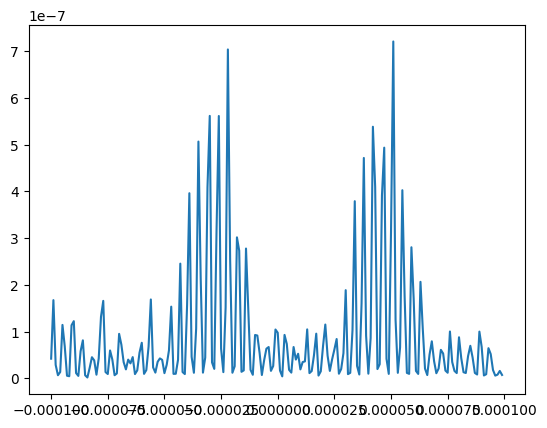

In [10]:
sp = config_dict["sim_params"]
detector_x = util.detector_x_vector(sp["detector_size"], sp["detector_pixel_size_x"])
plt.plot(detector_x, wf[0])

In [ ]:
full_x = util.full_x_vector(sp["N"], sp["dx"])
kp = util.load_keypoints(scratch_dir)

In [ ]:
plt.plot(full_x, np.abs(kp[4]) ** 2)
plt.xlim(-3e-5, 3e-5)

for i in range(-50, 50):
    plt.axvline(i * 4.2e-6)

plt.show()

## History

To see the interference pattern in empty space, we can record slices throughout the simulation and then plot them. `run_single_simulation` takes an optional argument `history_dz` defining the resolution with which we record the history.

Note that the history is not necessarily recorded with a constant z-spacing. Inside gratings and samples, one slice is recorded for every step. The history also records a list of z-coordinates at which the slices were recorded, which we can use for plotting.

In [ ]:
multisim.run_single_simulation(sim_path, 1, scratch_dir, save_keypoints_path=None, history_dz=0.02)

In [ ]:
# Path to the directory for the source with index 1
source_dir = multisim.get_sub_dir(sim_path, 1)

hist_x = np.load(source_dir / "history_x.npy")
hist_z = np.load(source_dir / "history_z.npy")
hist = np.load(source_dir / "history.npy")
plt.pcolormesh(
    hist_z,
    hist_x,
    hist,
    cmap="Greys_r",
    vmin=0,
    vmax=1e-6,
    shading="nearest",
)
plt.xlabel("z (m)")
plt.ylabel("x (m)")
print(hist_z[1]-hist_z[0],hist_x[1]-hist_x[0])